<a href="https://colab.research.google.com/github/kasev/mops/blob/master/scripts/exploring-matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import pickle
import urllib

import matplotlib.pyplot as plt

In [4]:

from google.colab import files
# defining function for saving+downloading the latest figure

def download_figure(fig=None, filename=None):
  if (filename==None) | (".png" not in str(filename)):
    filename = "figure.png"
  if fig==None:
    plt.savefig(filename)
  else:
    fig.savefig(filename)
  files.download(filename)

In [5]:
# load vocabularies
bidecades_vocabs_counts_df = pickle.load(urllib.request.urlopen("https://github.com/kasev/mops/raw/master/data/bidecades_vocabs_counts_df.pickle"))

In [6]:
# locally
#cooc_dict = pickle.load(open("../data/cooc_dict.pickle", "rb")

urllib.request.urlretrieve("https://github.com/kasev/mops/raw/master/data/cooc_dict.pickle", "temp.pickle")
with open("temp.pickle", "rb") as f:
    cooc_dict = pickle.load(f)

In [7]:
# transform the matrcices into dataframes (much more memory consuming...)
for bidecade, cooc in cooc_dict.items():
    try:
        cooc_df = pd.DataFrame(cooc.todense())
        cooc_norm_df = cooc_df / cooc_df.max()
        cooc_norm_df.columns = bidecades_vocabs_counts_df.index
        cooc_norm_df.index = bidecades_vocabs_counts_df.index
        cooc_dict[bidecade] = cooc_norm_df
    except:
        pass

In [8]:
cooc_dict["1900-1919"]["Paul"].sort_values(ascending=False).head(20)

Paul          1.000000
epistle       0.055488
Apostle       0.035643
letter        0.028799
apostle       0.028537
Jesus         0.012408
saint         0.011310
write         0.010595
use           0.009164
say           0.008548
life          0.008089
Peter         0.008084
doctrine      0.007852
conception    0.007025
view          0.006483
act           0.006210
thought       0.006088
make          0.005838
speak         0.005711
preach        0.005615
Name: Paul, dtype: float64

In [9]:
cooc_dict["1980-1999"]["Paul"].sort_values(ascending=False).head(20)

Paul          1.000000
letter        0.052684
Apostle       0.025385
use           0.021093
epistle       0.016693
apostle       0.014810
say           0.012032
write         0.010240
theology      0.009905
John          0.009842
see           0.008296
view          0.007742
argument      0.007689
thought       0.007393
speak         0.007334
understand    0.006118
make          0.006090
Siebeck       0.005324
Jesus         0.005295
argue         0.004876
Name: Paul, dtype: float64

In [10]:
def return_tfidf_position(key1, key2, bidecade):
    position = cooc_dict[bidecade][key1].sort_values(ascending=False).index.get_loc(key2)
    return position

In [11]:
# define bidecades:
bidecades_list = ['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999',
 '2000-2019']

In [12]:
return_tfidf_position("Paul", "apostle", "1940-1959")

7

In [13]:
# development...
key1 = "Paul"
key2 = "apostle"
positions = []
for bidecade in bidecades_list:
    positions.append(return_tfidf_position(key1, key2, bidecade))

In [14]:
def position_by_bidecade(key1, key2):
    positions = []
    for bidecade in bidecades_list:
        positions.append(return_tfidf_position(key1, key2, bidecade))
    return positions

# Explorations...

In [15]:
position_by_bidecade("Paul", "judaism")

[843, 3399, 561, 1353, 1925, 698]

In [16]:
position_by_bidecade("Paul", "apostle")


[4, 5, 7, 5, 5, 5]

In [17]:
position_by_bidecade("Paul", "Apostle")

[2, 1, 1, 2, 2, 1]

In [23]:

def plot_postion_by_bidecade(term1, term2):
  fig, ax = plt.subplots(tight_layout=True)
  ax.plot(position_by_bidecade(term1, term2))
  ax.set_title(term1+"~"+term2)
  ax.set_xticks(range(6))
  ax.set_xticklabels(bidecades_list, rotation=90)
  ax.invert_yaxis()
  ax.set_xlabel("bidecade")
  ax.set_ylabel("rank")
  return fig

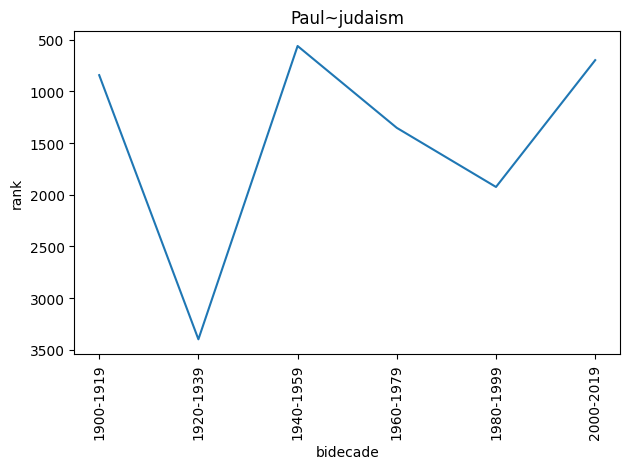

In [26]:
fig = plot_postion_by_bidecade("Paul", "judaism")

In [25]:
download_figure(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>